In [58]:
from fractaldimension import fractal_dimension
import cv2
import os

%matplotlib inline

def fractalDimension(number):
    im = cv2.imread('images/'+str(number)+'.tiff', cv2.IMREAD_GRAYSCALE)
    newDimension = fractal_dimension(im, 0.9)
    return newDimension

def compressionScore(number):
    statinfo = os.stat('images/'+str(number)+'.gif')
    gif = statinfo.st_size
    
    statinfo = os.stat('images/'+str(number)+'.tiff')
    tiff = statinfo.st_size
    
    return tiff/gif

In [59]:
# Enabling a cool progress bar
!jupyter nbextension enable --py widgetsnbextension


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [60]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
import random
import math
import number2automata


# Uncoment if you want to generate new images
'''
for _ in tqdm(range(400)):
    power = random.randint(1,256)
    number = random.randint(math.pow(10,power-1),math.pow(10,power))
    number2automata.numberToAutomata(number,30)
'''

scores = {}

files = os.listdir('images') # Getting the list of all image files
numbers = list(set(map(lambda x : x.split(".")[0], files))) # Converting image names "30.tiff" into "30"

for i in tqdm(range(len(numbers))):
    number = int(numbers[i])

    fscore = fractalDimension(number)
    cscore = compressionScore(number)
    scores[number] = {"Fractal Dimension":fscore,"Compression Eficciency":cscore}


In [61]:
import pandas as pd
df = pd.DataFrame(scores)
df = df.transpose()
df.head()

,Compression Eficciency,Fractal Dimension
26626994081518362003650260403549,1.136185,1.993405
749274644991575643834664431,0.998629,1.993509
6352556599316097939406462729979211350253805596270384909516743187406739550855577346547560215644688073867148910626102284214859629531269450272449039542327166,1.087962,1.993145
2787170551418480949920546903721805726453632431370356057841321055072594489376035454156197503501626617622931002592770204647124085401178907831561452898729512921183009400,1.178878,1.993093
72219350470259786145,1.135423,1.993509


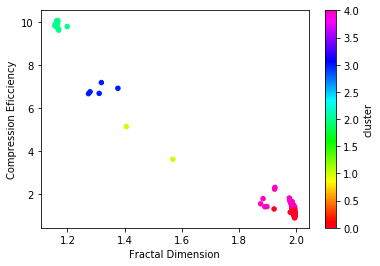

In [62]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=5).fit(df[['Fractal Dimension','Compression Eficciency']].values)
df["cluster"] = clustering.labels_

import matplotlib.pyplot as plt
from matplotlib import cm

fig, ax = plt.subplots()

cmap = cm.get_cmap('gist_rainbow')
ax = df.plot(kind='scatter', x='Fractal Dimension', y='Compression Eficciency',cmap=cmap, c='cluster',ax=ax)

plt.show()

In [63]:
def showImages(cluster,total=None):
    values = df[df["cluster"]== cluster].index

    import random
    plt.figure(figsize=(12,12))

    if total is None:
        total = len(values)

    sq = int(math.sqrt(total))

    for i,k in enumerate(random.sample(range(len(values)), sq*sq)):
        plt.subplot(sq,sq,i+1)
        img = plt.imread('images/'+str(values[k])+'.tiff')
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()

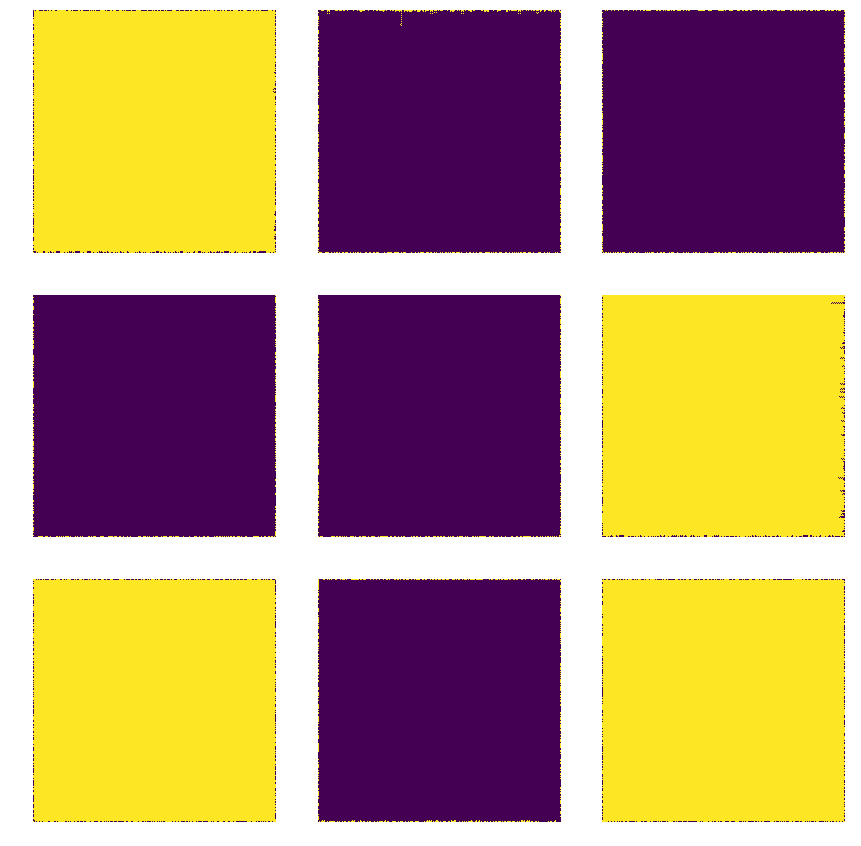

In [67]:
showImages(2)

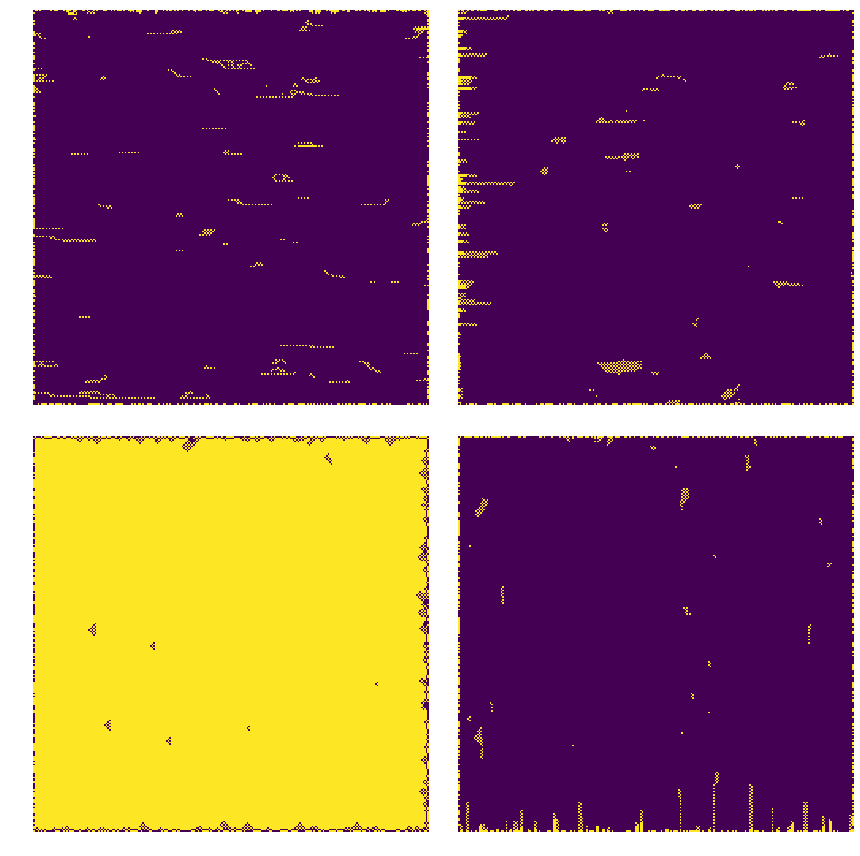

In [65]:
showImages(3)

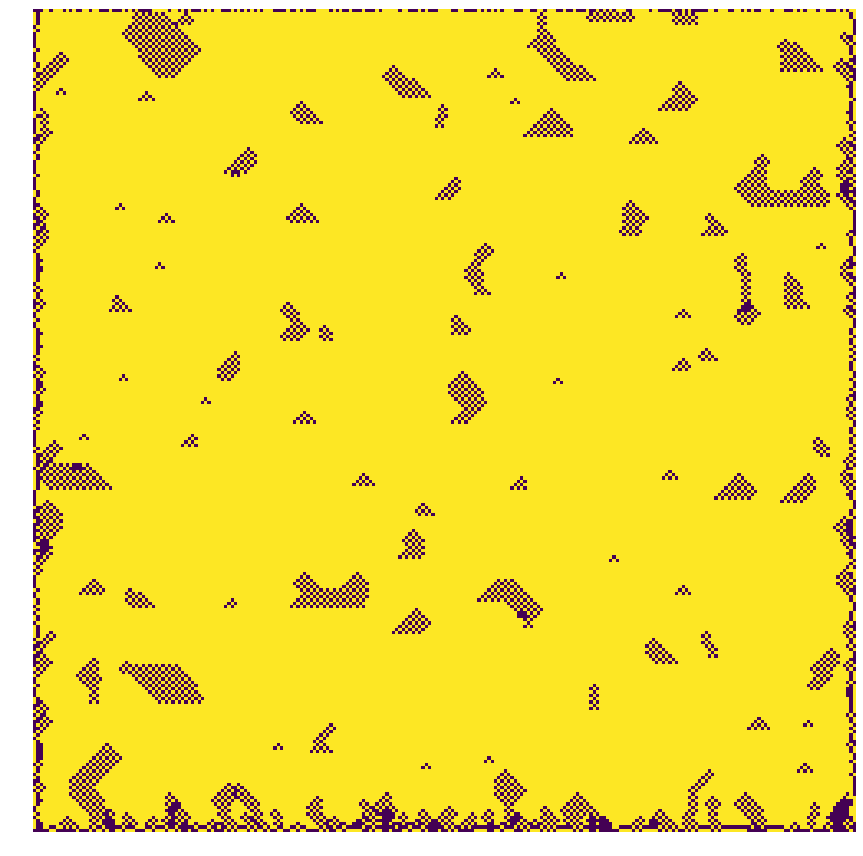

In [66]:
showImages(1)

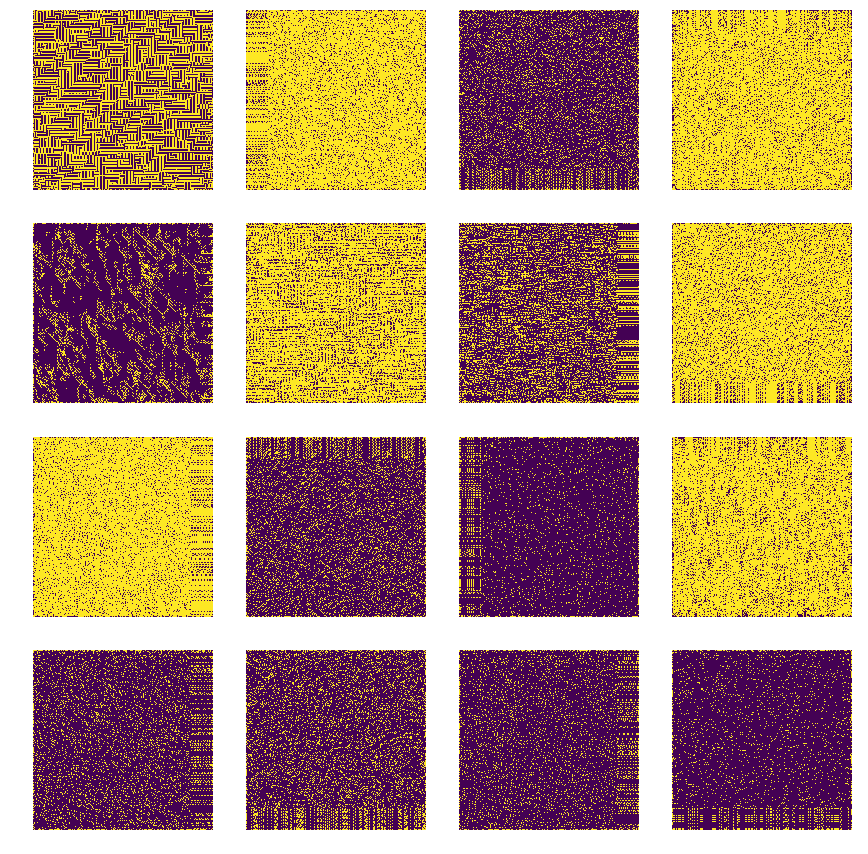

In [70]:
showImages(4)

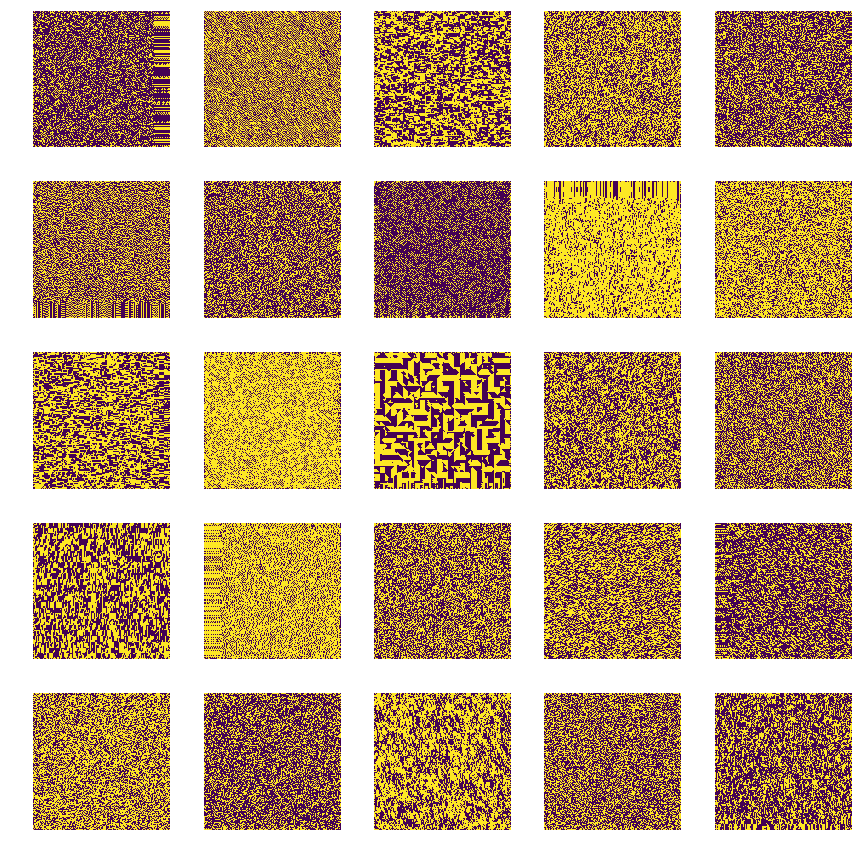

In [69]:
showImages(0,25)